In [1]:
import seaborn
print(seaborn.__version__)

0.13.1


In [2]:
import tensorflow as tf
import numpy as np
import numpy
import matplotlib.pyplot as plt
#import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import sys, getopt
from keras import backend as K
import glob
import os
#import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Importing required libraries

import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [651]:
path = r'D:\data\sale in csv\sales20-23' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [652]:
Exchange_rate = pd.read_csv(r'D:\data\sale in csv\Exchange_rate.csv')
Kolkata_temp = pd.read_csv(r'D:\Users\House of Musa\kol_temp.csv')

In [653]:
Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'], format = '%Y-%m-%d')
Exchange_rate
Kolkata_temp['time'] = pd.to_datetime(Kolkata_temp['time'], format = '%Y-%m-%d')
Kolkata_temp.tail()
Exchange_rate.tail()

,Date,Price
1572,2024-01-10,83.023
1573,2024-01-11,83.063
1574,2024-01-12,83.580
1575,2024-01-13,83.063
1576,2024-01-14,83.063


In [654]:
df['Total_Amt'] = (df['RSP'] * df['Bill_Qty']) - (df['Discount_Amt'])
print(df.Store.unique())

['CITIMART - CHOWRINGHEE' 'CITIMART - COOCH BEHAR' 'CITIMART - GARIAHAT'
 'CITIMART - HATIBAGAN' 'CITIMART - LAKE MALL' 'CITIMART - NEW MARKET'
 'CITIMART -BIDHAN ROAD' 'CITIMART -BURDWAN' nan]


In [655]:
df.DEPARTMENT.unique()

array(['Imitation', 'Toys', 'Sports Items', 'Stationary', 'Soft Toys',
       'Novelties', 'Churi', 'Dry Flower', 'Sunglass', 'Deo',
       'Detergent Liquids', 'BABY GIFT PACK', 'Soap', 'Hair Shampoo',
       'Baby Cream', 'Baby Lotion', 'Perfumes', 'Face Cleansers',
       'Skin Cream', 'Toothpaste', 'Baby Shampoo', 'Baby Diapers', 'MUSK',
       'Lipbalm', 'Sunscreens', 'Hair Oils', 'Toner', 'Facewash',
       'BABY WIPES', 'Body Lotion', 'Face Gel', 'Conditioners',
       'Utensil Cleaner Bars', 'Baby Oil', 'Hair Gel', 'Body Wash',
       'Handwash', 'Face Pack', 'Baby Soap', 'Baby Powder', 'Moistures',
       'PREMIUM SOAP', 'Hair Serum', 'CLEANSING MILK', 'Talc', 'SERUM',
       'Scrubs', 'Toothbrush', 'Room Freshners', 'Baby Toothbrush',
       'Detergent Powders', 'Baby Care Accessories', 'Body Oils',
       'Hair Vataliser', 'BODY SPA', 'Plain Biscuits',
       'Chocolates & Candies', 'Ctc Tea', 'Sweets', 'Cakes',
       'INSTANT NOODLES', 'Pickles', 'Cream Biscuits',
       '

In [656]:
# splitting dataframe by Store location
# grouping by particular dataframe column
#grouped = df.groupby(df.Store)
#df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
#df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
#df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
#df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

#df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
#df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
#df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
#df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]


In [657]:
#df_CHOWRINGHEE.head()

In [658]:
#len(pd.unique(df_CHOWRINGHEE['DEPARTMENT']))

In [659]:
grouped_chowringhee = df.groupby(df.DEPARTMENT)

In [1211]:
#STORE-CHOWRINGHEE
#grouped_chowringhee = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.DEPARTMENT)
#grouped_chowringhee = df_NEWMARKET.groupby(df_NEWMARKET.DEPARTMENT)
#grouped_chowringhee = df_HATIBAGAN.groupby(df_HATIBAGAN.DEPARTMENT)

#MEN
df_CHOWRINGHEE_CasualshirtsM = grouped_chowringhee.get_group('Casual Shirts (M)')
df_CHOWRINGHEE_ComboSuitingShirtingM = grouped_chowringhee.get_group('Combo Suiting & Shirting Pcs (M)')
df_CHOWRINGHEE_FormalshirtM = grouped_chowringhee.get_group('Formal Shirts (M)')
df_CHOWRINGHEE_JeansM = grouped_chowringhee.get_group('Jeans (M)')
df_CHOWRINGHEE_BermundasM = grouped_chowringhee.get_group('Bermudas (M)')
df_CHOWRINGHEE_Hanky = grouped_chowringhee.get_group('Hanky')
df_CHOWRINGHEE_LingeriesM = grouped_chowringhee.get_group('Lingeries (M)')
df_CHOWRINGHEE_PyajamaM = grouped_chowringhee.get_group('Pyajama (M)')
df_CHOWRINGHEE_SandoM = grouped_chowringhee.get_group('Sando (M)')
df_CHOWRINGHEE_Socks = grouped_chowringhee.get_group('Socks')
df_CHOWRINGHEE_CasualtrouserM = grouped_chowringhee.get_group('Casual Trouser (M)')
df_CHOWRINGHEE_FormaltrouserM = grouped_chowringhee.get_group('Formal Trouser (M)')
df_CHOWRINGHEE_TshirtM = grouped_chowringhee.get_group('T-Shirts (M)')



df_CHOWRINGHEE_JacketM = grouped_chowringhee.get_group('Jacket (M)')
df_CHOWRINGHEE_PulloverM = grouped_chowringhee.get_group('Pullover (M)')
df_CHOWRINGHEE_SweaterstM = grouped_chowringhee.get_group('Sweaters (M)')
df_CHOWRINGHEE_BlazerM = grouped_chowringhee.get_group('Blazer (M)')

#LADIES
df_CHOWRINGHEE_DupattaL = grouped_chowringhee.get_group('Dupatta (L)')
df_CHOWRINGHEE_LachaL = grouped_chowringhee.get_group('Lacha (L)')
df_CHOWRINGHEE_NightyL = grouped_chowringhee.get_group('Nighty (L)')
df_CHOWRINGHEE_SalwarsuitL = grouped_chowringhee.get_group('Salwar Suit (L)')
df_CHOWRINGHEE_Dressmaterial = grouped_chowringhee.get_group('Dress Material')
df_CHOWRINGHEE_Bra = grouped_chowringhee.get_group('Bra')
df_CHOWRINGHEE_Panty = grouped_chowringhee.get_group('Panty')
df_CHOWRINGHEE_SareeCotton = grouped_chowringhee.get_group('Cotton')
df_CHOWRINGHEE_Fancy = grouped_chowringhee.get_group('Fancy')
df_CHOWRINGHEE_SareePremiume = grouped_chowringhee.get_group('Premiume')
df_CHOWRINGHEE_SareeSynthetics = grouped_chowringhee.get_group('Synthetics')
df_CHOWRINGHEE_SareeTant = grouped_chowringhee.get_group('Tant')
df_CHOWRINGHEE_SareeEmbroidery = grouped_chowringhee.get_group('Embroidery')
df_CHOWRINGHEE_CapriL = grouped_chowringhee.get_group('Capri (L)')
df_CHOWRINGHEE_CoordinateSetsL = grouped_chowringhee.get_group('Coordinate Sets (L)')
df_CHOWRINGHEE_CulottesL = grouped_chowringhee.get_group('Culottes (L)')
df_CHOWRINGHEE_DressesL = grouped_chowringhee.get_group('Dresses (L)')
df_CHOWRINGHEE_HalfpantL = grouped_chowringhee.get_group('Half Pant (L)')
df_CHOWRINGHEE_JeansL = grouped_chowringhee.get_group('Jeans (L)')
df_CHOWRINGHEE_KurtiL = grouped_chowringhee.get_group('Kurti (L)')
df_CHOWRINGHEE_LeggingsL = grouped_chowringhee.get_group('Leggings (L)')
df_CHOWRINGHEE_ParallelL = grouped_chowringhee.get_group('Parallel (L)')
df_CHOWRINGHEE_PlazoL = grouped_chowringhee.get_group('Plazo (L)')
df_CHOWRINGHEE_ShirtL = grouped_chowringhee.get_group('Shirt (L)')
df_CHOWRINGHEE_SkirtsL = grouped_chowringhee.get_group('Skirts (L)')
df_CHOWRINGHEE_TopL = grouped_chowringhee.get_group('Top (L)')
df_CHOWRINGHEE_TrousersL = grouped_chowringhee.get_group('Trousers (L)')
df_CHOWRINGHEE_TshirtL = grouped_chowringhee.get_group('T-Shirt (L)')
df_CHOWRINGHEE_TunicL = grouped_chowringhee.get_group('Tunic (L)')




df_CHOWRINGHEE_SweatersL = grouped_chowringhee.get_group('Sweaters (L)')
df_CHOWRINGHEE_PulloverL = grouped_chowringhee.get_group('Pullover (L)')
df_CHOWRINGHEE_JacketL = grouped_chowringhee.get_group('Jacket (L)')
df_CHOWRINGHEE_StoleL = grouped_chowringhee.get_group('Stole (L)')







#GIRLS
df_CHOWRINGHEE_CapriG = grouped_chowringhee.get_group('Capri (G)')
df_CHOWRINGHEE_CaprisetG = grouped_chowringhee.get_group('Capri Set (G)')
df_CHOWRINGHEE_DungreeG = grouped_chowringhee.get_group('Dungree (G)')
df_CHOWRINGHEE_FrockG = grouped_chowringhee.get_group('Frock (G)')
df_CHOWRINGHEE_HalfpantG = grouped_chowringhee.get_group('Half Pant (G)')
df_CHOWRINGHEE_HalfPantSetG = grouped_chowringhee.get_group('Half Pant Set (G)')
df_CHOWRINGHEE_InnerG = grouped_chowringhee.get_group('Inner (G)')
df_CHOWRINGHEE_JeansG = grouped_chowringhee.get_group('Jeans (G)')
df_CHOWRINGHEE_LeggingsG = grouped_chowringhee.get_group('Leggings (G)')
df_CHOWRINGHEE_PlazoG = grouped_chowringhee.get_group('Plazo (G)')
df_CHOWRINGHEE_SkirttopsetG = grouped_chowringhee.get_group('Skirt Top Set (G)')
df_CHOWRINGHEE_SkirtG = grouped_chowringhee.get_group('Skirts (G)')
df_CHOWRINGHEE_TopG = grouped_chowringhee.get_group('Top (G)')
df_CHOWRINGHEE_TshirtG = grouped_chowringhee.get_group('T-Shirt (G)')



df_CHOWRINGHEE_PulloverG = grouped_chowringhee.get_group('Pullover (G)')
df_CHOWRINGHEE_SweaterG = grouped_chowringhee.get_group('Sweater (G)')
df_CHOWRINGHEE_JacketG = grouped_chowringhee.get_group('Jacket (G)')
df_CHOWRINGHEE_JeggingsG = grouped_chowringhee.get_group('Jeggings (G)')

#BOYS
df_CHOWRINGHEE_BabasuitB = grouped_chowringhee.get_group('Baba Suit (B)')
df_CHOWRINGHEE_CapriB = grouped_chowringhee.get_group('Capri (B)')
df_CHOWRINGHEE_DungreeB = grouped_chowringhee.get_group('Dungree (B)')
df_CHOWRINGHEE_HalfpantB = grouped_chowringhee.get_group('Half Pant (B)')
df_CHOWRINGHEE_JeansB = grouped_chowringhee.get_group('Jeans (B)')
df_CHOWRINGHEE_PyajamaB = grouped_chowringhee.get_group('Pyajama (B)')
df_CHOWRINGHEE_SandoB = grouped_chowringhee.get_group('Sando (B)')
df_CHOWRINGHEE_ShirtB = grouped_chowringhee.get_group('Shirt (B)')
df_CHOWRINGHEE_TrouserB = grouped_chowringhee.get_group('Trouser (B)')
df_CHOWRINGHEE_TshirtB = grouped_chowringhee.get_group('T-Shirt (B)')



df_CHOWRINGHEE_SandoSetB = grouped_chowringhee.get_group('Sando Set (B)')
df_CHOWRINGHEE_TrouserB = grouped_chowringhee.get_group('Trouser (B)')
df_CHOWRINGHEE_PulloverB = grouped_chowringhee.get_group('Pullover (B)')
df_CHOWRINGHEE_JacketB = grouped_chowringhee.get_group('Jacket (B)')

#OTHERS


df_CHOWRINGHEE_Bedsheets = grouped_chowringhee.get_group('Bed Sheets')
df_CHOWRINGHEE_Sweets = grouped_chowringhee.get_group('Sweets')
df_CHOWRINGHEE_Deo = grouped_chowringhee.get_group('Deo')
#df_CHOWRINGHEE_Whiskey = grouped_chowringhee.get_group('Whisky')
df_CHOWRINGHEE_Towel = grouped_chowringhee.get_group('Towel')
df_CHOWRINGHEE_Chappal = grouped_chowringhee.get_group('Chappal')
df_CHOWRINGHEE_Kashmiriswals = grouped_chowringhee.get_group('Kashmiri Swals')
df_CHOWRINGHEE_Novelties = grouped_chowringhee.get_group('Novelties')
df_CHOWRINGHEE_sportsshoe = grouped_chowringhee.get_group('Sports Shoe')
df_CHOWRINGHEE_Hairshampoo = grouped_chowringhee.get_group('Hair Shampoo')
df_CHOWRINGHEE_Perfumes = grouped_chowringhee.get_group('Perfumes')
df_CHOWRINGHEE_Stationary = grouped_chowringhee.get_group('Stationary')

df_CHOWRINGHEE_Facewash = grouped_chowringhee.get_group('Facewash')
df_CHOWRINGHEE_TrollyBag = grouped_chowringhee.get_group('Trolly Bag')
df_CHOWRINGHEE_Shoe = grouped_chowringhee.get_group('Shoe')
df_CHOWRINGHEE_Toys = grouped_chowringhee.get_group('Toys')
df_CHOWRINGHEE_Bag = grouped_chowringhee.get_group('Bag')

df_CHOWRINGHEE_FridgeBottle = grouped_chowringhee.get_group('Fridge Bottle')
df_CHOWRINGHEE_Blankets = grouped_chowringhee.get_group('Blankets')
df_CHOWRINGHEE_Imitation = grouped_chowringhee.get_group('Imitation')
#df_CHOWRINGHEE_LipSticks = grouped_chowringhee.get_group('Lip Sticks')
df_CHOWRINGHEE_SkinCream = grouped_chowringhee.get_group('Skin Cream')
df_CHOWRINGHEE_Soap = grouped_chowringhee.get_group('Soap')
df_CHOWRINGHEE_Other = grouped_chowringhee.get_group('Other')
df_CHOWRINGHEE_BabyAccessory = grouped_chowringhee.get_group('Baby Accessory')
df_CHOWRINGHEE_LiquidConcentrates = grouped_chowringhee.get_group('Liquid Concentrates')
#df_CHOWRINGHEE_Foundation = grouped_chowringhee.get_group('Foundation')

df_CHOWRINGHEE_Confectionery = grouped_chowringhee.get_group('CONFECTIONERY')
df_CHOWRINGHEE_Belt = grouped_chowringhee.get_group('Belt')
df_CHOWRINGHEE_DryFlower = grouped_chowringhee.get_group('Dry Flower')
df_CHOWRINGHEE_Sandal = grouped_chowringhee.get_group('Sandal')
df_CHOWRINGHEE_Curtains = grouped_chowringhee.get_group('Curtains')
#df_CHOWRINGHEE_LipColour = grouped_chowringhee.get_group('Lip Colour')
df_CHOWRINGHEE_Container = grouped_chowringhee.get_group('Container')
df_CHOWRINGHEE_SchoolBag = grouped_chowringhee.get_group('School Bag')



#Kids
#df_CHOWRINGHEE_BombabyK = grouped_chowringhee.get_group('Bom Baby (K)')
df_CHOWRINGHEE_TshirtRm = grouped_chowringhee.get_group('T-Shirts (Rm)')

#FOOD
df_CHOWRINGHEE_InstantNoodles = grouped_chowringhee.get_group('INSTANT NOODLES')
df_CHOWRINGHEE_Sauces = grouped_chowringhee.get_group('Sauces')
df_CHOWRINGHEE_CtcTea = grouped_chowringhee.get_group('Ctc Tea')
df_CHOWRINGHEE_FruitBasedJuices = grouped_chowringhee.get_group('Fruit Based Juices')
df_CHOWRINGHEE_Pickles = grouped_chowringhee.get_group('Pickles')
df_CHOWRINGHEE_SugarBoilesChocolates = grouped_chowringhee.get_group('Sugar Boiled Chocolates')
df_CHOWRINGHEE_NINamkeens = grouped_chowringhee.get_group('N.I.Namkeens')
df_CHOWRINGHEE_Jams = grouped_chowringhee.get_group('Jams')
df_CHOWRINGHEE_ChineseNoodles = grouped_chowringhee.get_group('CHINESE NOODLES')
df_CHOWRINGHEE_Cookies = grouped_chowringhee.get_group('Cookies')


#RAPHAAA
df_CHOWRINGHEE_Sweaters_Rm = grouped_chowringhee.get_group('Sweaters (Rm)')
df_CHOWRINGHEE_Pullover_Rm = grouped_chowringhee.get_group('Pullover (Rm)')
df_CHOWRINGHEE_TrackPant_Rm = grouped_chowringhee.get_group('Track Pant (Rm)')
df_CHOWRINGHEE_Tshirts_Rm = grouped_chowringhee.get_group('T-Shirts (Rm)')
df_CHOWRINGHEE_Shrug_Rm = grouped_chowringhee.get_group('Shrug (Rm)')
df_CHOWRINGHEE_CasualTrousers_Rm = grouped_chowringhee.get_group('Casual Trousers (Rm)')
df_CHOWRINGHEE_Jacket_Rm = grouped_chowringhee.get_group('Jacket (Rm)')
df_CHOWRINGHEE_CasualShirts_Rm = grouped_chowringhee.get_group('Casual Shirts (Rm)')
df_CHOWRINGHEE_HalfPant_Rm = grouped_chowringhee.get_group('Half Pant (Rm)')
df_CHOWRINGHEE_Jeans_Rm = grouped_chowringhee.get_group('Jeans (Rm)')
df_CHOWRINGHEE_FormalShirts_Rm = grouped_chowringhee.get_group('Formal Shirts (Rm)')
df_CHOWRINGHEE_FormalTrouserRm = grouped_chowringhee.get_group('Formal Trouser (Rm)')
df_CHOWRINGHEE_KurtaPayjama_Rm = grouped_chowringhee.get_group('Kurta Payjama (Rm)')

df_CHOWRINGHEE_FormalShirt_Rl = grouped_chowringhee.get_group('Formal Shirt (Rl)')
df_CHOWRINGHEE_Kurti_Rl = grouped_chowringhee.get_group('Kurti (Rl)')
df_CHOWRINGHEE_Sweaters_Rl = grouped_chowringhee.get_group('Sweaters (Rl)')
df_CHOWRINGHEE_Top_Rl = grouped_chowringhee.get_group('Top (Rl)')
df_CHOWRINGHEE_Jacket_Rl = grouped_chowringhee.get_group('Jacket (Rl)')
df_CHOWRINGHEE_Parallel_Rl = grouped_chowringhee.get_group('Parallel (Rl)') 
df_CHOWRINGHEE_HalfPant_Rl = grouped_chowringhee.get_group('Half Pant (Rl)') 
df_CHOWRINGHEE_Pullover_Rl = grouped_chowringhee.get_group('Pullover (Rl)')
df_CHOWRINGHEE_Jeans_Rl = grouped_chowringhee.get_group('Jeans (Rl)') 
df_CHOWRINGHEE_Dress_Rl = grouped_chowringhee.get_group('Dress (Rl)') 
df_CHOWRINGHEE_CropTop_Rl = grouped_chowringhee.get_group('Crop Top (Rl)')
#df_CHOWRINGHEE_Stole_Rl = grouped_chowringhee.get_group('Stole (Rl)') 
df_CHOWRINGHEE_Tshirt_Rl = grouped_chowringhee.get_group('T-Shirt (Rl)')


df_CHOWRINGHEE_Skirts_Rl = grouped_chowringhee.get_group('Skirts (Rl)')
df_CHOWRINGHEE_TankTop_Rl = grouped_chowringhee.get_group('Tank Top (Rl)')
df_CHOWRINGHEE_Wraparound_Rl = grouped_chowringhee.get_group('Wrapparound (Rl)') 
df_CHOWRINGHEE_Trousers_Rl = grouped_chowringhee.get_group('Trousers (Rl)')
#df_CHOWRINGHEE_Stole_Rl = grouped_chowringhee.get_group('Stole (Rl)')
df_CHOWRINGHEE_Bodysuit_Rl = grouped_chowringhee.get_group('Bodysuit (Rl)')
df_CHOWRINGHEE_Shrug_Rl = grouped_chowringhee.get_group('Shrug (Rl)')
df_CHOWRINGHEE_CropShirt_Rl = grouped_chowringhee.get_group('Crop Shirt (Rl)')
df_CHOWRINGHEE_BraTop_Rl = grouped_chowringhee.get_group('Bra Top (Rl)')
df_CHOWRINGHEE_TrackPant_Rl = grouped_chowringhee.get_group('Track Pant (Rl)')
df_CHOWRINGHEE_Tunic_Rl = grouped_chowringhee.get_group('Tunic (Rl)')
df_CHOWRINGHEE_Blouse_Rl = grouped_chowringhee.get_group('Blouse (Rl)')
#df_CHOWRINGHEE_SalwarSuit_Rl = grouped_chowringhee.get_group('Salwar Suit (Rl)')
df_CHOWRINGHEE_Scarf_Rl = grouped_chowringhee.get_group('Scarf (Rl)')
df_CHOWRINGHEE_Cullots_Rl = grouped_chowringhee.get_group('Cullots (Rl)')
df_CHOWRINGHEE_Corset_Rl = grouped_chowringhee.get_group('CORSET (RL)')

#CMO
#df_CHOWRINGHEE_Bermunda_CMO = grouped_chowringhee.get_group('Bermuda (CMO)')
df_CHOWRINGHEE_Jeans_CMO = grouped_chowringhee.get_group('Jeans (CMO)')
df_CHOWRINGHEE_CasualShirts_CMO = grouped_chowringhee.get_group('Casual Shirts (CMO)')
df_CHOWRINGHEE_Trousers_CMO = grouped_chowringhee.get_group('Trousers (CMO)')
df_CHOWRINGHEE_Skirts_CMO = grouped_chowringhee.get_group('Skirts (CMO)')
df_CHOWRINGHEE_TShirts_CMO = grouped_chowringhee.get_group('T-Shirts (CMO)')
df_CHOWRINGHEE_BabaSuit_CMO = grouped_chowringhee.get_group('Baba Suit (CMO)')
df_CHOWRINGHEE_TankTop_CMO = grouped_chowringhee.get_group('Tank top (CMO)')
df_CHOWRINGHEE_TShirt_CMO = grouped_chowringhee.get_group('T-Shirt (CMO)')
df_CHOWRINGHEE_HalfPant_CMO = grouped_chowringhee.get_group('Half pant (CMO)')
df_CHOWRINGHEE_SalwarSuit_CMO = grouped_chowringhee.get_group('Salwar suit (CMO)')
df_CHOWRINGHEE_BoysSando_CMO = grouped_chowringhee.get_group('Boys Sando (CMO)')
df_CHOWRINGHEE_Frock_CMO = grouped_chowringhee.get_group('Frock (CMO)')
df_CHOWRINGHEE_Parallel_CMO = grouped_chowringhee.get_group('Parallel (CMO)')
df_CHOWRINGHEE_kurti_CMO = grouped_chowringhee.get_group('Kurti (CMO)')
df_CHOWRINGHEE_BoysShirt_CMO = grouped_chowringhee.get_group('Boys Shirt (CMO)')
df_CHOWRINGHEE_FormalShirts_CMO = grouped_chowringhee.get_group('Formal Shirts (CMO)')
df_CHOWRINGHEE_Inner_CMO = grouped_chowringhee.get_group('Inner (CMO)')
df_CHOWRINGHEE_Top_CMO = grouped_chowringhee.get_group('Top (CMO)')
df_CHOWRINGHEE_BoysTShirt_CMO = grouped_chowringhee.get_group('Boys T-Shirts (CMO)')
df_CHOWRINGHEE_Premiume_CMO = grouped_chowringhee.get_group('Premiume (CMO)')
df_CHOWRINGHEE_Gown_CMO = grouped_chowringhee.get_group('Gown (CMO)')
df_CHOWRINGHEE_FormalTrousers_CMO = grouped_chowringhee.get_group('Formal Trousers (CMO)')
df_CHOWRINGHEE_Plazo_CMO = grouped_chowringhee.get_group('Plazo (CMO)')
df_CHOWRINGHEE_CropTop_CMO = grouped_chowringhee.get_group('Crop top (CMO)')
df_CHOWRINGHEE_Tunic_CMO = grouped_chowringhee.get_group('Tunic (CMO)')
df_CHOWRINGHEE_BornBaby_CMO = grouped_chowringhee.get_group('Born Baby (CMO)')
df_CHOWRINGHEE_Pyajama_CMO = grouped_chowringhee.get_group('Pyajama (CMO)')
df_CHOWRINGHEE_Capri_CMO = grouped_chowringhee.get_group('Capri (CMO)')
df_CHOWRINGHEE_Dress_CMO = grouped_chowringhee.get_group('Dress (CMO)')
#df_CHOWRINGHEE_TShirts_CMO = grouped_chowringhee.get_group('T-shirts (CMO)')
#df_CHOWRINGHEE_HalfPant_CMO = grouped_chowringhee.get_group('Half Pant (CMO)')
#df_CHOWRINGHEE_FormalShirt_CMO = grouped_chowringhee.get_group('Formal shirt (CMO)')
df_CHOWRINGHEE_BabaSuitGirls_CMO = grouped_chowringhee.get_group('Baba suit girls (CMO)')
df_CHOWRINGHEE_Cotton_CMO = grouped_chowringhee.get_group('Cotton (CMO)')
df_CHOWRINGHEE_Kurta_CMO = grouped_chowringhee.get_group('Kurta (CMO)')
df_CHOWRINGHEE_Shirt_CMO = grouped_chowringhee.get_group('Shirt (CMO)')
df_CHOWRINGHEE_CropShirt_CMO = grouped_chowringhee.get_group('Crop shirt (CMO)')
df_CHOWRINGHEE_Synthetics_CMO = grouped_chowringhee.get_group('Synthetics (CMO)')
df_CHOWRINGHEE_Fancy_CMO = grouped_chowringhee.get_group('Fancy (CMO)')
df_CHOWRINGHEE_Assorted_CMO = grouped_chowringhee.get_group('Assorted (CMO)')
df_CHOWRINGHEE_Sweatshirt_CMO = grouped_chowringhee.get_group('SWEATSHIRT (CMO)')
df_CHOWRINGHEE_Pullover_CMO = grouped_chowringhee.get_group('Pullover (CMO)')
df_CHOWRINGHEE_Hoodies_CMO = grouped_chowringhee.get_group('HOODIES (CMO)')
df_CHOWRINGHEE_FullTShirt_CMO = grouped_chowringhee.get_group('FULL T-SHIRT (CMO)')
#df_CHOWRINGHEE_Sweater_CMO = grouped_chowringhee.get_group('Sweater (CMO)')
#df_CHOWRINGHEE_Jacket_CMO = grouped_chowringhee.get_group('Jacket (CMO)')
df_CHOWRINGHEE_Cap_CMO = grouped_chowringhee.get_group('CAP (CMO)')
#df_CHOWRINGHEE_Stole_CMO = grouped_chowringhee.get_group('Stole (CMO)')
df_CHOWRINGHEE_CoordsSet_CMO = grouped_chowringhee.get_group('COORDS SET (CMO)')
df_CHOWRINGHEE_Blazer_CMO = grouped_chowringhee.get_group('BLAZER (CMO)')
df_CHOWRINGHEE_FullShirts_CMO = grouped_chowringhee.get_group('FULL SHIRTS (CMO)')



In [1212]:
df1 = df_CHOWRINGHEE_TshirtM.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Total_Amt']]
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort.head()

,Bill_Date,RSP,Bill_Qty,Total_Amt
38943,2020-01-01,399.0,1.0,399.0
124200,2020-01-01,499.0,1.0,299.4
127427,2020-01-01,299.0,1.0,299.0
66895,2020-01-01,199.0,1.0,159.2
126624,2020-01-01,499.0,1.0,499.0


In [1213]:
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
all_dates = pd.DataFrame(pd.date_range(df1_sort['Bill_Date'].min(), df1_sort['Bill_Date'].max()), columns=['Bill_Date'])

# from the all_dates DataFrame, left join onto the DataFrame with missing dates
new_df = all_dates.merge(right=df1_sort, how='left', on='Bill_Date')
print(len(pd.unique(new_df['Bill_Date'])))
new_df.tail(15)
new_df.isnull().sum()

1475


Bill_Date     0
RSP          48
Bill_Qty     48
Total_Amt    48
dtype: int64

In [1214]:
df_a = new_df.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Total_Amt=('Total_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a
df_exchange = df_a.merge(Exchange_rate, left_on = 'Bill_Date', right_on = 'Date')
df_ex_temp = df_exchange.merge(Kolkata_temp, left_on = 'Bill_Date', right_on = 'time')
df_f = df_ex_temp.loc[:, [ 'Bill_Date', 'Total_Amt', 'Total_Qty', 'RSP_AVG', 'Price', 'tavg']]
df_f.head()

,Bill_Date,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
0,2020-01-01,38062.6,95.0,432.666667,71.227,18.7
1,2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2,2020-01-03,18782.2,47.0,470.489362,71.770,17.5
3,2020-01-06,32805.3,80.0,429.625000,71.867,17.0
4,2020-01-07,25654.5,59.0,467.437500,71.845,16.7


In [1215]:
df_f.index = pd.to_datetime(df_f.Bill_Date)
df_f
df_daily = df_f.resample('D').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean'})
df_monthly = df_f.resample('M').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean'})


In [1216]:
df_daily

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
Bill_Date,,,,,
2020-01-01,38062.6,95.0,432.666667,71.227,18.7
2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2020-01-03,18782.2,47.0,470.489362,71.770,17.5
2020-01-04,0.0,0.0,NaN,NaN,NaN
2020-01-05,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...
2024-01-10,9861.3,20.0,517.235294,83.023,20.0
2024-01-11,31398.8,58.0,654.636364,83.063,19.4
2024-01-12,33245.0,55.0,611.264151,83.580,16.7


In [1217]:
df_daily.mean()

Total_Amt    67074.473390
Total_Qty      172.589831
RSP_AVG        428.299789
Price           77.365055
tavg            26.569573
dtype: float64

In [1259]:
df_f_m = df_daily
#df_f_m.index = pd.to_datetime(df_f_m.Bill_Date)
#df_f_m.head(3)

In [1219]:
df_monthly = df_daily.resample('M').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean'})
#df_monthly

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
Bill_Date,,,,,
2020-01-31,1089240.40,2674.0,449.894601,71.267870,18.991304
2020-02-29,2048231.31,7984.0,283.296121,71.536150,21.425000
2020-03-31,2125011.79,7568.0,317.403693,74.564955,27.045455
2020-04-30,17675.00,46.0,408.819444,76.178409,29.136364
2020-05-31,148594.80,720.0,302.956434,75.674952,29.238095
2020-06-30,1010128.10,3876.0,294.415203,75.723136,30.090909
2020-07-31,1157166.20,4228.0,297.558218,74.928826,29.917391
2020-08-31,948233.43,3128.0,322.760411,74.569762,29.052381
2020-09-30,2221290.40,6395.0,359.747451,73.518273,29.495455


In [1220]:
# Data Preparation: input should be float type
df_f_m['Total_Amt'] = df_f_m['Total_Amt'] * 1.0
# Assigning one store from each category
sales_a = df_f_m['Total_Amt']
sales_a.head()


Bill_Date
2020-01-01    38062.6
2020-01-02    39970.3
2020-01-03    18782.2
2020-01-04        0.0
2020-01-05        0.0
Freq: D, Name: Total_Amt, dtype: float64

<Axes: xlabel='Bill_Date'>

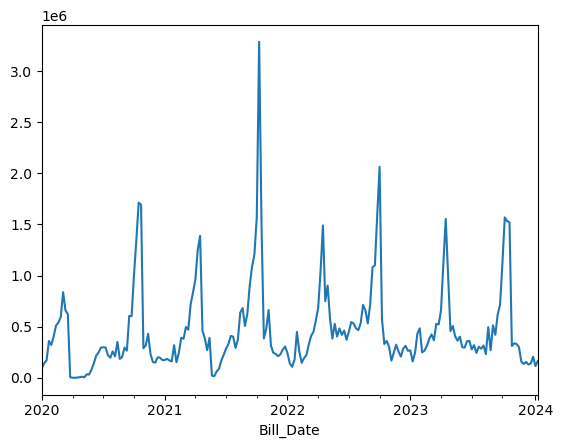

In [1221]:
# Trend
sales_a.resample('W').sum().plot()

In [1222]:
sales_a.head()

Bill_Date
2020-01-01    38062.6
2020-01-02    39970.3
2020-01-03    18782.2
2020-01-04        0.0
2020-01-05        0.0
Freq: D, Name: Total_Amt, dtype: float64

In [1223]:
# Creating a train dataset
train_prophet = df_daily.copy()
train_prophet.reset_index(level=0, inplace=True)
train_prophet.head(5)

,Bill_Date,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
0,2020-01-01,38062.6,95.0,432.666667,71.227,18.7
1,2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2,2020-01-03,18782.2,47.0,470.489362,71.770,17.5
3,2020-01-04,0.0,0.0,NaN,NaN,NaN
4,2020-01-05,0.0,0.0,NaN,NaN,NaN


In [1224]:
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Bill_Date': 'ds', 'Total_Amt': 'y'})
#train_prophet = train_prophet.rename(columns = {'Bill_Date': 'ds', 'Total_Qty': 'y'})
train_prophet.head()
#train_prophet.head()

,ds,y,Total_Qty,RSP_AVG,Price,tavg
0,2020-01-01,38062.6,95.0,432.666667,71.227,18.7
1,2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2,2020-01-03,18782.2,47.0,470.489362,71.770,17.5
3,2020-01-04,0.0,0.0,NaN,NaN,NaN
4,2020-01-05,0.0,0.0,NaN,NaN,NaN


In [1225]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("D").sum()
ts_week_prophet.head()

,y,Total_Qty,RSP_AVG,Price,tavg
ds,,,,,
2020-01-01,38062.6,95.0,432.666667,71.227,18.7
2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2020-01-03,18782.2,47.0,470.489362,71.770,17.5
2020-01-04,0.0,0.0,0.000000,0.000,0.0
2020-01-05,0.0,0.0,0.000000,0.000,0.0


In [1226]:
# Resetting the index
ts_week_prophet_train = ts_week_prophet.reset_index()
ts_week_prophet_train.head()

,ds,y,Total_Qty,RSP_AVG,Price,tavg
0,2020-01-01,38062.6,95.0,432.666667,71.227,18.7
1,2020-01-02,39970.3,94.0,484.824176,71.350,20.3
2,2020-01-03,18782.2,47.0,470.489362,71.770,17.5
3,2020-01-04,0.0,0.0,0.000000,0.000,0.0
4,2020-01-05,0.0,0.0,0.000000,0.000,0.0


In [1227]:
# Fitting data to Prophet model
prophet_1 = Prophet() 
prophet_1.fit(ts_week_prophet_train)

future_1 = prophet_1.make_future_dataframe(periods = 60, freq = "D") #no of weeks
forecast_1 = prophet_1.predict(future_1)

forecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail() 

17:05:26 - cmdstanpy - INFO - Chain [1] start processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1530,2024-03-10,2524.371700,-72916.140511,89149.568451
1531,2024-03-11,94616.122092,21000.365411,173968.311866
1532,2024-03-12,88862.366874,16032.462350,164270.822421
1533,2024-03-13,94884.416436,16332.088251,176103.541643
1534,2024-03-14,93035.459714,19446.571733,170935.663513


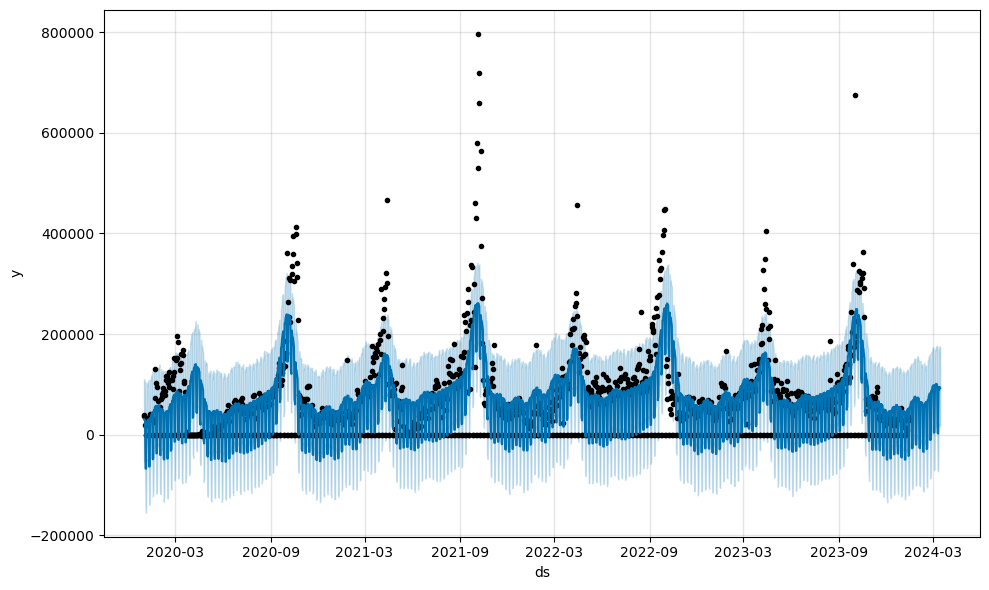

In [1228]:
# Visualizing predicions of forecast
prophet_1.plot(forecast_1);

In [1229]:
ps1= (forecast_1['yhat_upper'].tail(90)).sum()
print(ps1)

10593764.372995539


In [1230]:
# Checking the RMSE of Prophet model
metric_prophet_1 = forecast_1.set_index('ds')[['yhat']].join(ts_week_prophet_train.set_index('ds').y).reset_index()
metric_prophet_1.dropna(inplace=True)
rms_prophet_1 = mean_squared_error(metric_prophet_1.y, metric_prophet_1.yhat)
rms_prophet_1

3647311428.100058

In [1231]:
#Hypertuning Prophet model
#There are a lot of parameters available in the Prophet model. One of the most important ones is 'holidays'. 
#This lets us pass holidays explicitly while training the model. We'll create a new 'holidays' data frame by taking 
#observations when there was school or state holiday.

#We'll also use three more parameters viz.

#interval_width: It defines the uncertainty level to make the prediction. The default value is 0.8 but we'll take 0.95
#because we want to be certain in our predictions.
#growth: We know that 'Sales' can take any value and there is no saturation point. So, we'll take 'linear' growth instead of
#'logarithmic'.
#yearly_seasonality: We'll explicitly pass it as 'True' because we know that there is a yearly seasonality (discussed above)
#present in our data.

In [1232]:
# Encoding state holiday categorical variable
#train_prophet["StateHoliday_cat"] = train_prophet["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})

In [1233]:
# Choosing only required cols
train_prophet = train_prophet[['ds', 'y']]
train_prophet.head()

,ds,y
0,2020-01-01,38062.6
1,2020-01-02,39970.3
2,2020-01-03,18782.2
3,2020-01-04,0.0
4,2020-01-05,0.0


In [1234]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("D").sum()
ts_week_prophet.head()

,y
ds,
2020-01-01,38062.6
2020-01-02,39970.3
2020-01-03,18782.2
2020-01-04,0.0
2020-01-05,0.0


In [1235]:
# Resetting the index
ts_week_prophet_train = ts_week_prophet.reset_index()
ts_week_prophet_train.head()

,ds,y
0,2020-01-01,38062.6
1,2020-01-02,39970.3
2,2020-01-03,18782.2
3,2020-01-04,0.0
4,2020-01-05,0.0


In [1236]:
# Fitting data to Prophet model
prophet_2 = Prophet(interval_width = 0.95, growth='linear', yearly_seasonality = True) 
prophet_2.fit(ts_week_prophet_train)
print("done")

future_2 = prophet_2.make_future_dataframe(periods = 90, freq = "D") 
forecast_2 = prophet_2.predict(future_2)

forecast_2[["ds", "yhat", "yhat_lower", "yhat_upper"]] # We have a new dataframe, which includes, the forecast and the uncertaini

17:05:31 - cmdstanpy - INFO - Chain [1] start processing
17:05:31 - cmdstanpy - INFO - Chain [1] done processing


done


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,31048.565962,-88043.009969,146674.435258
1,2020-01-02,29255.909323,-89238.494809,137106.722062
2,2020-01-03,29371.111987,-84522.357043,143158.961833
3,2020-01-04,-67042.137096,-191305.362794,39771.614463
4,2020-01-05,-67424.208800,-194204.333734,47050.564351
...,...,...,...,...
1560,2024-04-09,146078.231328,31443.395603,267843.716769
1561,2024-04-10,153513.886881,45567.370011,273148.180115
1562,2024-04-11,152308.276045,47024.262666,272880.349223
1563,2024-04-12,152166.504382,37815.348331,273171.819677


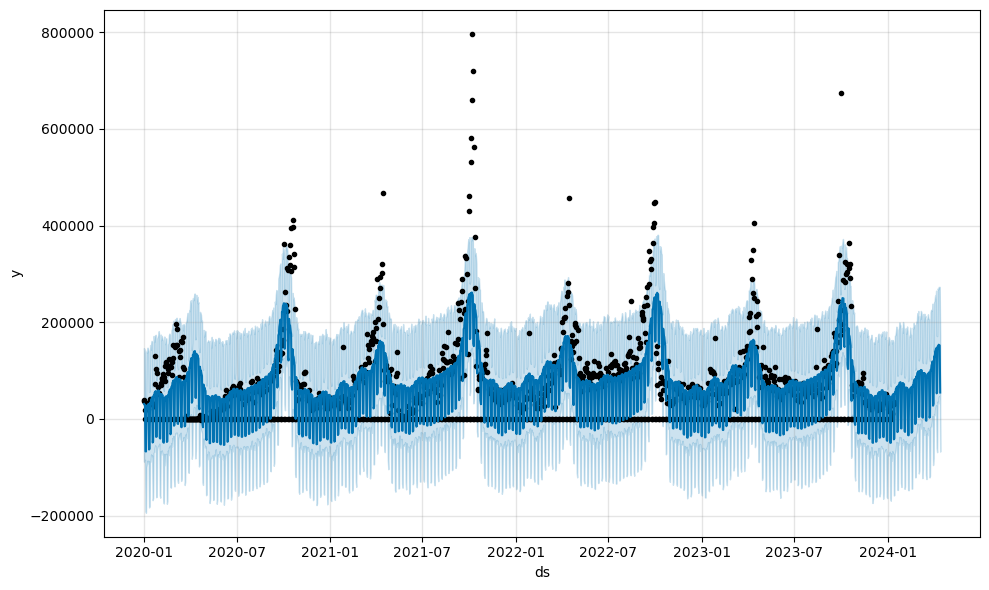

In [1260]:
# Visualizing predicions of forecast
prophet_2.plot(forecast_2);

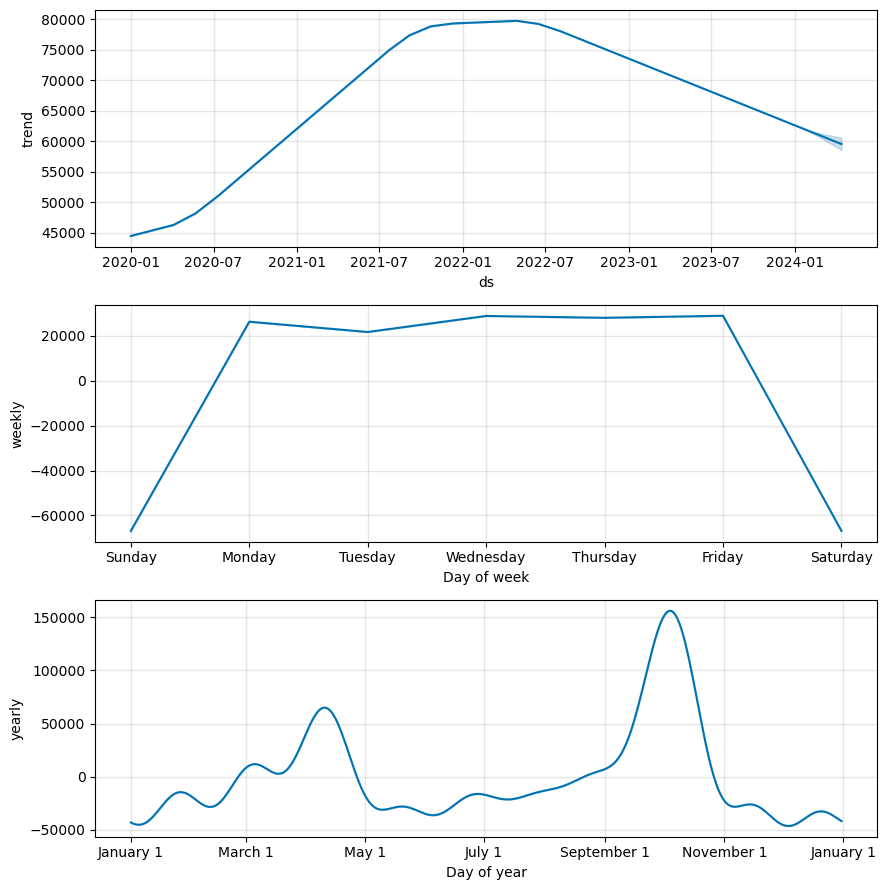

In [1261]:
# Visualizing trend and seasonality components
prophet_2.plot_components(forecast_2);

In [1262]:
# Checking the RMSE of Prophet model
metric_prophet_2 = forecast_2.set_index('ds')[['yhat']].join(ts_week_prophet_train.set_index('ds').y).reset_index()
metric_prophet_2.dropna(inplace=True)
rms_prophet_2 = mean_squared_error(metric_prophet_2.y, metric_prophet_2.yhat)
rms_prophet_2

3647311428.100058

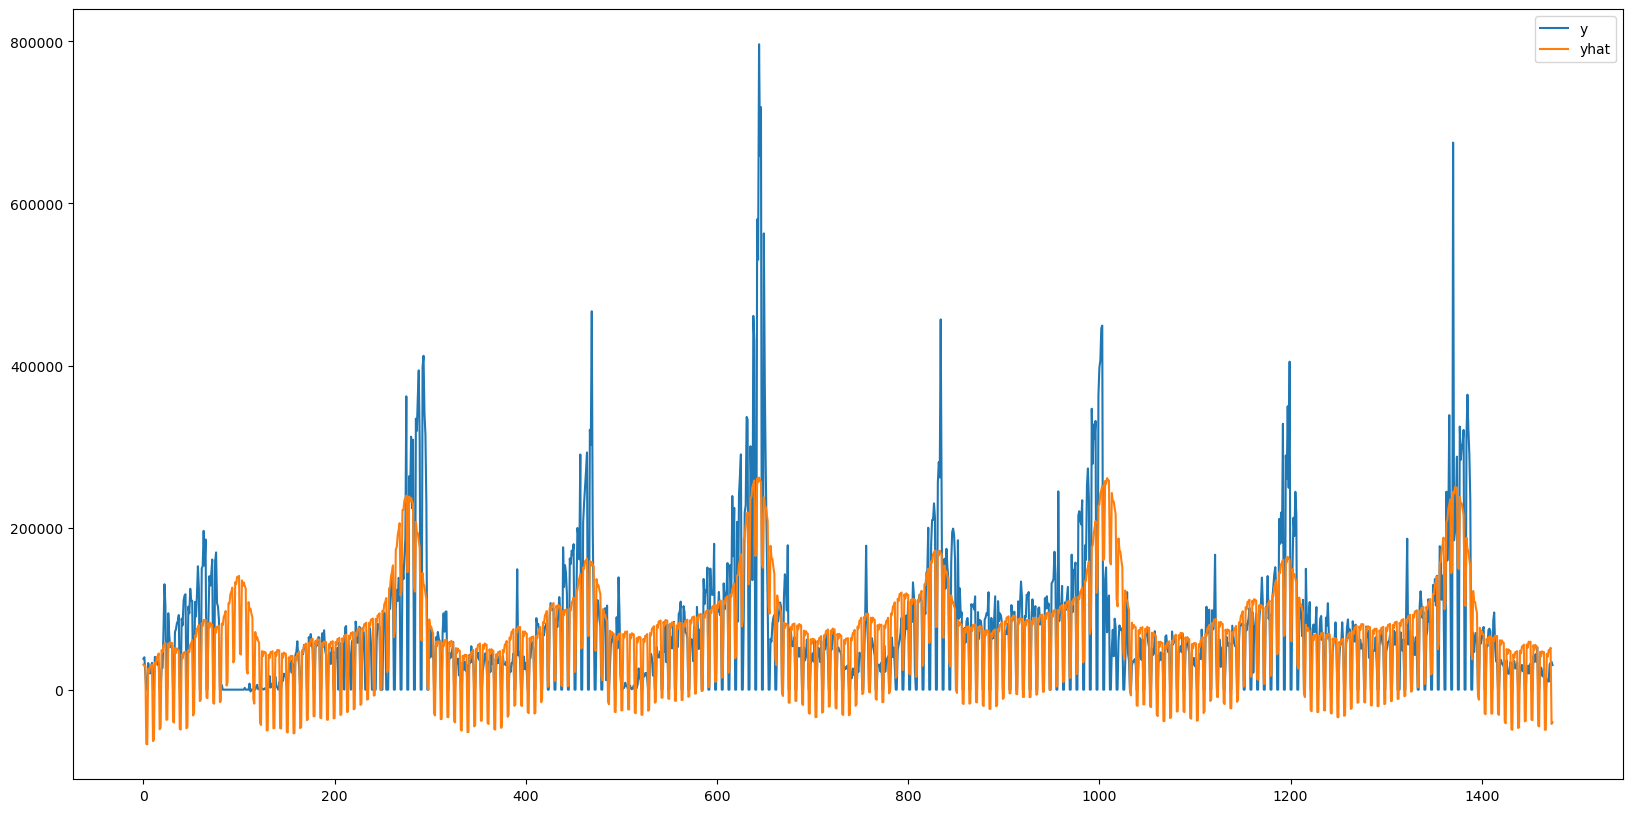

In [1263]:
# Visualizing the performance of model
plt.figsize=(10,20)
metric_prophet_2["y"].plot(figsize=(20,10))
metric_prophet_2["yhat"].plot()
plt.legend()
plt.show()

In [1255]:
upper_limit = (forecast_2['yhat_upper'].tail(90)).sum()
print(upper_limit)

16432732.324436525


In [1256]:
target = (forecast_2['yhat'].tail(90)).sum()
print(target)


5828713.090330323


In [1258]:
k= ((upper_limit - target)/ upper_limit) *100
print(k)

64.52986043189753


In [1239]:
print( target * 1.30)

7577327.017429421


In [1245]:
res = ((upper_limit)/3) + target
print(res)

11306290.531809166


In [1246]:
res1 = ((upper_limit)/2) + target
print(res1)

14045079.252548587


In [1250]:
print(res * 1.20)

13567548.638170999


In [1251]:
final = upper_limit - target
print(final)

10604019.234106202


In [1252]:
print(final * 1.20)

12724823.08092744
